# Hypothesis testing and statistical analysis
So far we have explored how to load, clean and summarise data in Python. In this module, we are going to learn how to test hypotheses using several methods.

**Brief**

Did Apple Store apps receive better reviews than Google Play apps?

## The challenges of the workshop are:

1. Clean the two data sets
    * Load the two datasets
    * Pick the columns that we are going to work with 
    * Check the data types and fix them
    * Create a column called platform whose values are “apple” or “google”
2. Join the two data sets
    * To do that use the function `append` with the parameter `ignore_index`
    * Eliminate the `NaN` values
    * Only use the apps which contain reviews
3. Summarise the data visually and analytically (by the column `platform`)
    * Use the function .describe()
    * Use a boxplot
4. Test the following hypothesis “The differences in the average ratings of apple and google users are due to chance and not due to differences in the platforms” 
    * Let’s use permutations
    * OPTIONAL - Let’s use traditional methods: parametric and non-parametric

As you are going to see, the first steps of every single data analysis are loading and cleaning the data. Today is not an exception, so that is going to be our first step.

## Importing the libraries

In this case we are going to import pandas, numpy, scipy, random and matplotlib.pyplot.

In [80]:
import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

## Challenge 1 -  Loading and cleaning data

### Load data
Load the data from the folder Stats in your Desktop, this data is from the website Kaggle. Kaggle is an extraordinary repository of data and good fun data competitions. The data from the Apple Store can be found [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) and the data from Google Store can be found [here](https://www.kaggle.com/lava18/google-play-store-apps).

In [81]:
# Once the files are saved, we need to load them into Python using read_csv and pandas
# Let's create a variable called google where we are going to store the path of the file
google = '~/Downloads/Stats/googleplaystore.csv'
# Let's read the csv file into a data frame called Google
Google = pd.read_csv(google)
# Let's observe the first three entriLes
Google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [82]:
# Once the files are saved, we need to load them into Python using read_csv and pandas
# Let's create a variable called apple where we are going to store the path of the file 
apple = '~/Downloads/Stats/AppleStore.csv'
# Let's read the csv file into a data frame called Apple
Apple = pd.read_csv(apple)
# Let's observe the first three entries
Apple.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


Based on the documentation of both datasets, the most adequate columns to answer the brief are:

1. For Google:
    * `Category` # Do we need this?
    * `Rating`
    * `Reviews`
    * `Price` (maybe)
2. For Apple:    
    * `prime_genre` # Do we need this?
    * `user_rating` 
    * `rating_count_tot`
    * `price` (maybe)

### Subsetting
Let's select the columns that we want for both datasets.

Overwrite the subsets in the original variables.

In [83]:
# Let's subset the dataframe Google by only selecting the variables ['Category', 'Rating', 'Reviews', 'Price']
Google = Google[['Category', 'Rating', 'Reviews', 'Price']]
# Let's check  three random entries
Google.sample(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [84]:
# Let's subset the dataframe Apple by only selecting the variables ['prime_genre', 'user_rating', 'rating_count_tot', 'price']
Apple = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]
# Let's check the last three entries
Apple.tail(3)

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


### Checking data types for both Apple and Google
In this part let's figure out whether the variables that we selected contain errors/mistakes in the expected datatype.

In [85]:
# Use the function dtypes
## Check out the data types of the dataframe Apple. Are the data types expected?
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

As you can see all the data types of `Apple` are expected. What about the data types of `Google`?

In [86]:
# Check out the data types of the dataframe Google. Are the data types expected?
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

Check out the unique values of the column Price in the dataset Google

In [87]:
# Use the function .unique to the column Price in the dataset Google
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

Interesting... There is a price called `Everyone`. That is a massive mistake. Let's check the datapoints that have the price value as `Everyone`.

In [88]:
# Let's check what is the data point which contains the price 'Everyone' using a subset of Google.
## Subset by the column Price that equals to `Everyone`.
Google[Google['Price'] == 'Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


Now it is time to eliminate that observation. 

In [89]:
# Let's eliminate that point because it has the wrong information.
## To do that, subset Google but instead of using 'is equal to' use 'is different from'.
Google = Google[Google['Price'] != 'Everyone']
### Check again the unique values of Google
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Now the problem is that the prices contain the symbol `$`. Therefore for Python these values are still considered `str` elements and not numbers! So let's eliminate the dollar symbol and convert the column into a numeric data type.

In [90]:
# Let's create a variable called nosymb.
## That variable will take the Price column of Google and apply the str.replace function.
### In the parameters specify to find '$' and replace with nothing ''.
nosymb = Google['Price'].str.replace('$','')
#### Apply pd.to_numeric() to the variable nosymb, save it as the Price column in Google
Google['Price'] = pd.to_numeric(nosymb)

Let's check the data types of Google.

In [91]:
# Use the function dtypes
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

The column `Reviews` is still an object column, we need that column to be a numeric column.

In [92]:
# Use the function pd.to_numeric, save the result in the same column
Google['Reviews'] = pd.to_numeric(Google['Reviews'])

In [93]:
# Let's check the data types of Google again
Google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

### New columns for `Apple` and `Google` called `platform`
Let's create a new column called `platform` where the value for the Apple dataframe is 'apple', and for Google is 'google'

In [94]:
# Create a column called 'platform' and add either 'apple' or 'google' respectively
Apple['platform'] = 'apple'
Google['platform'] = 'google'

### Changing the column names to unify the two datasets
Now we need to rename the variables of `Apple` to be the same as `Google` or vice versa.
In this case, we are going to change the `Apple` column names to the names of `Google` columns.

This is an important step to unify the two datasets.

In [95]:
# Changing the nam,es of the Apple columns with the Google columns names
Apple.columns = Google.columns

## Challenge 2 -  Combine the two datasets

Combine the two datasets into a single data frame called `df`

In [96]:
# Let's use the function append to Google 
## use Apple as the first parameter to append and set ignore_index to True
df = Google.append(Apple, ignore_index=True)
# Check 12 random points of your dataset
df.sample(12)

,Category,Rating,Reviews,Price,platform
8486,FAMILY,4.5,663,0.00,google
6697,FAMILY,4.6,2736,0.00,google
17809,Games,5.0,25859,0.00,apple
16924,Education,4.0,161,0.00,apple
15323,Shopping,4.5,5448,0.00,apple
11312,Health & Fitness,4.5,10,3.99,apple
13950,Entertainment,4.0,2154,0.00,apple
6386,FAMILY,3.6,445,0.00,google
2061,FAMILY,4.5,64,0.00,google
4216,AUTO_AND_VEHICLES,4.6,4140,1.99,google


As you can see there are some `NaN` values, eliminate all the `NaN` values from the table

In [97]:
# Let's check first the dimesions of df before dropping `NaN` values
print(df.shape)
# Use the function .dropna to eliminate all the NaN values, overwrite in the same dataframe
df =  df.dropna()
# Check the dimensions of df
print(df.shape)

(18037, 5)
(16563, 5)


Now let's check how many apps have 0 reviews.

In [98]:
# Subset df by the column which is 0
## Use the function .count()
df[df['Reviews'] == 0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

929 apps do not have reviews, we need to eliminate these points!

In [99]:
# Eliminate the points that have 0 reviews by subseting df using the expression "different from" !=
df = df[df['Reviews'] != 0]

## Challenge 3 -  Summarise the data visually and analytically (by the column `platform`)

### Analytical summary
We need a summary of the column `Rating` but separated by the different platforms

In [100]:
# To summarise analytically, let's use the function `.describe` to the column `Rating`
## after grouping by the variable `platform` 
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


### Visual summary
We need a summary of the column `Rating` but separated by the different platforms, let's use a boxplot!

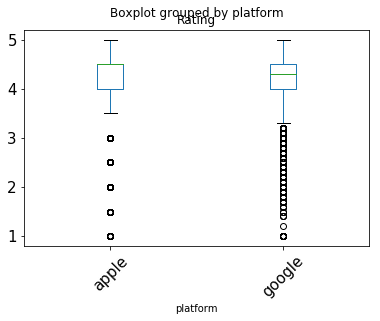

In [101]:
# We can use the function boxplot on the df
## set the parameters by = 'platform' and column = ['Rating']
df.boxplot(by='platform', column=['Rating'], grid=False, rot=45, fontsize=15)

platform
apple     AxesSubplot(0.125,0.125;0.775x0.755)
google    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rating, dtype: object

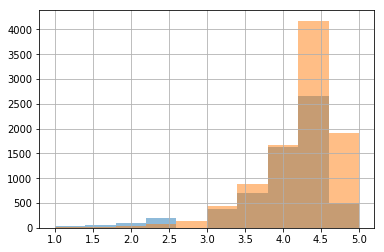

In [102]:
## Optional histogram
df.groupby("platform")["Rating"].hist(alpha=0.5)

Are the distributions normally distributed?

In [103]:
# Let's create the subset of the column 'Rating' by the different platforms. 
## Call the subsets 'apple' and 'google' 
apple = df[df['platform'] == 'apple']['Rating']
google = df[df['platform'] == 'google']['Rating']

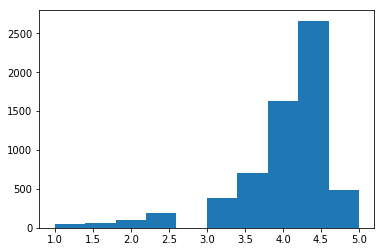

In [104]:
# Create a histogram of the apple reviews distribution
histoApple = plt.hist(apple)

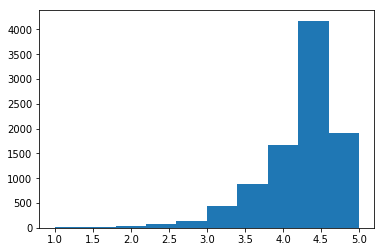

In [105]:
# Create a histogram of the google reviews distribution
histoGoogle = plt.hist(google)

## Challenge 4 -  Test whether there are significant differences between Apple and Google reviews

The first step to test a hypothesis is to define the hypothesis that you want to test. For that reason your task here is to provide a null and an alternative hypothesis to complete the brief.

H<sub>null</sub>:


H<sub>alternative</sub>:

The second step is to determine the significance level.

SL: 

### Permutations 
Permutations and bootstraping are the ultimate techniques to test differences between groups. The extraordinary power lies
in the fact that there are no previous assumptions, therefore it is very easy to apply to any problem.  
Check out more about permutations [here](http://rasbt.github.io/mlxtend/user_guide/evaluate/permutation_test/)

In [106]:
df2 = df
# Let's create a variable `Permutation1` and use an analytical summary after grouping by `platform`
## Use the function np.random.permutation
rating = np.array(df["Rating"])
# Let's create a variable `Permutation1` and use an analytical summary after grouping by `platform`
## Use the function np.random.permutation
Permutation1 = np.random.permutation(rating)
# Let's create a variable called Permutation in df with the Permutation1 values
df2["Permutation"]=Permutation1
df2.groupby(by= "platform")["Permutation"].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.135897,0.607404,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.134070,0.616670,1.0,4.0,4.3,4.5,5.0


In [107]:
# Let's compare with the previous analytical summary
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


In [108]:
# Let's create a vector with the differences - that will be the distribution of the null hypothesis 
difference = list()
for i in range(10000):
    permutation = np.random.permutation(df['Rating'])
    difference.append(np.mean(permutation[df['platform'] == 'apple']) - np.mean(permutation[df['platform'] == 'google']))

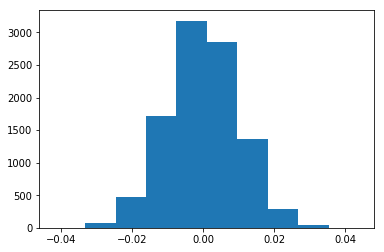

In [109]:
# Let's see the distribution of the null hypothesis
histo = plt.hist(difference)

In [110]:
# Let's see what was the observed difference between the averages
obs_difference = np.mean(apple) - np.mean(google)
obs_difference = abs(obs_difference)
obs_difference

0.14206054745123442

In [112]:
# How many simulated permutations have equal or extreme value compared to the observed difference?
extreme1 = 0
for differences in difference: 
    if differences > obs_difference:
        extreme1 = extreme1 + 1
extreme1
extreme2 = 0
for differences in difference: 
    if differences < -obs_difference:
        extreme2 = extreme2 + 1
extreme2

print("p-value is:", (extreme1+extreme2)/len(difference))

p-value is: 0


### Other statistical tests - OPTIONAL
Now that the hypotheses are defined, and also the significance level, we are going to try to reject or accept the null hypothesis. [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test) helps to evaluate differences between two independent groups. Run a Student's t-test to compare the differences between Apple and Google reviews.

Now let's check how many apps have 0 reviews.

In [113]:
# Let's use the function stats.ttest_ind
## in the parameters use the 'Rating' column of a subset for apple and google platform
t_test = stats.ttest_ind(apple, google)
# Check the test
t_test

Ttest_indResult(statistic=-14.294169045166113, pvalue=4.642189615775503e-46)

What can you conclude? Maybe the following code will help

In [114]:
alpha = 0.05
if t_test.pvalue <= alpha:
    print('The p-value was:', t_test.pvalue,
          'The observed differences are very unlikely to be due to chance, we reject the null hypothesis')
else:
    print('The p-value was:', t_test.pvalue,
          'The observed differences are likely to be due to chance, we accept the null hypothesis')

The p-value was: 4.642189615775503e-46 The observed differences are very unlikely to be due to chance, we reject the null hypothesis


Student's t-test has very strong assumptions that we probably overlooked. Could you write down the assumptions of the Student's t-test? You can find them [here](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test) 

As you can see Student's t-test assumes that the variances between groups are equal. This is not the case (check the analytical summary), we can still use Welch’s t-test using the same function that we used before.

In [115]:
# Let's use the function stats.ttest_ind
## in the parameters use the 'Rating' column of a subset for apple and google platform
### the parameter equal_var set to False
welch = stats.ttest_ind(apple, google, equal_var=False)
if welch.pvalue <= alpha:
    print('The p-value was:', welch.pvalue,
          'The observed differences are very unlikely to be due to chance, we reject the null hypothesis')
else:
    print('The p-value was:', welch.pvalue,
          'The observed differences are likely to be due to chance, we accept the null hypothesis')

The p-value was: 1.607484672627137e-40 The observed differences are very unlikely to be due to chance, we reject the null hypothesis


Both tests (Student's t-test and Welch’s t-test) assume that the data is normally distributed, we can test that using the function stats.normaltest

In [116]:
# Test the normal distribution of the apple reviews using the function stats.normaltest
## save the result in a variable called apple_normal
apple_normal = stats.normaltest(apple)

In [117]:
# Test the normal distribution of the google reviews using the function stats.normaltest
## save the result in a variable called google_normal
google_normal = stats.normaltest(google)

There are non-parametric tests whose assumptions are more relaxed, the equivalent non-parametric version of a Student's t-test is Mann-Whitney U Test.

In [118]:
# Use the function stats.mannwhitneyu to test the differences between Apple and Google
mann_whitney = stats.mannwhitneyu(apple, google)
mann_whitney
if mann_whitney.pvalue <= alpha:
    print('The p-value was:', mann_whitney.pvalue,
          'The observed differences are very unlikely to be due to chance, we reject the null hypothesis')
else:
    print('The p-value was:', mann_whitney.pvalue,
          'The observed differences are likely to be due to chance, we accept the null hypothesis')


The p-value was: 1.4464448193978504e-12 The observed differences are very unlikely to be due to chance, we reject the null hypothesis


## What can you conclude?

Type your conclusion: 

## Extra challenge
Imagine that the observed difference was 0.022, calculate the p-value for this case.